In [3]:
#import the libraries
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from statsmodels.formula.api import ols
# from sklearn.linear_model import LinearRegression

US Totals - https://www.nass.usda.gov/Statistics_by_Subject/result.php?D8B0098B-6554-3189-BC67-DC33E42E6E26&sector=CROPS&group=FIELD%20CROPS&comm=CORN
State Total 
- Go to Data & Statistics and use 'Access Quick Stats (searchable database)'
- Then use the below selections

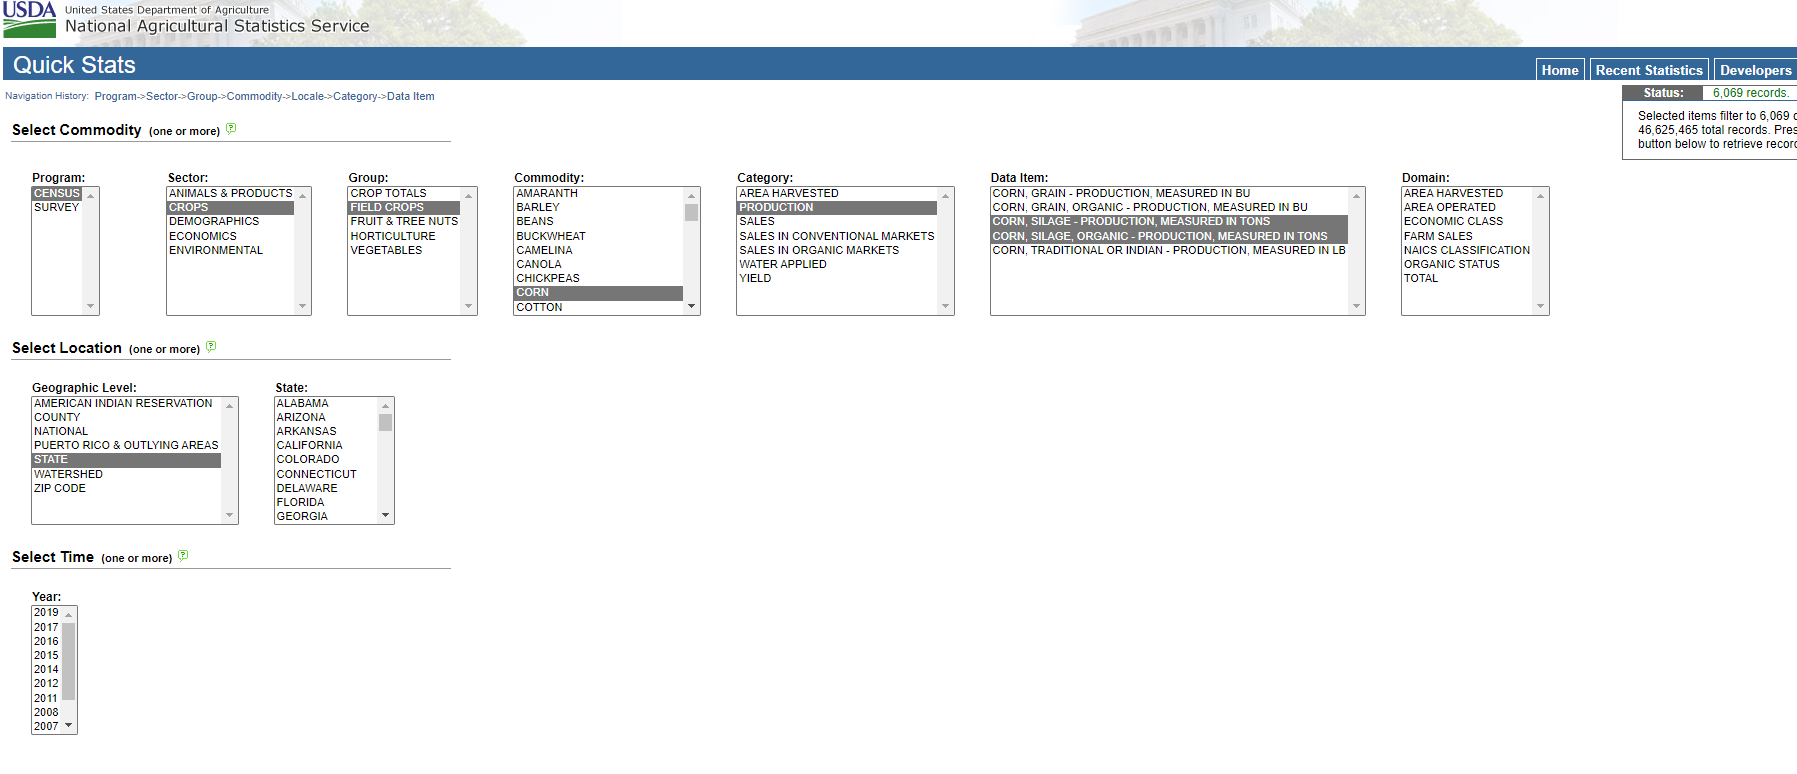


## Value is measured in tons

In [26]:
df = pd.read_csv('corn-state.csv')

In [27]:
df.isnull().sum()

Program                0
Year                   0
Period                 0
Week Ending         6069
Geo Level              0
State                  0
State ANSI             0
Ag District         6069
Ag District Code    6069
County              6069
County ANSI         6069
Zip Code            6069
Region              6069
watershed_code         0
Watershed           6069
Commodity              0
Data Item              0
Domain                 0
Domain Category        0
Value                  0
CV (%)              1129
dtype: int64

In [28]:
df.columns
df = df[['Year', 'State', 'Value',]]
# df = df.drop('Week Ending', axis=1)
# df = df.drop('Ag District', axis=1)
# df = df.drop('Ag District Code', axis=1)
# df = df.drop('County', axis=1)
# df = df.drop('County ANSI', axis=1)
# df = df.drop('Zip Code', axis=1)
# df = df.drop('Region', axis=1)
# df = df.drop('Watershed', axis=1)
# df = df.drop('Program', axis=1)
# df = df.drop('State ANSI', axis=1)
# df = df.drop('watershed_code', axis=1)
# df = df.drop('Geo Level', axis=1)

In [29]:
print(f'Columns: {df.shape[1]}, Rows: {df.shape[0]}\n\n')
print('Types\n', df.dtypes)

Columns: 3, Rows: 6069


Types
 Year      int64
State    object
Value    object
dtype: object


In [30]:
df['Value'] = df['Value'].replace(['(D)'], '0')
df['Value'] = df['Value'].replace([' (D)'], '0')
df['Value'] = pd.to_numeric(df.Value.astype(str).str.replace(',',''), errors='coerce') \
              .fillna(0) \
              .astype('int64')
df.describe(include='all')

,Year,State,Value
count,6069.000000,6069,6.069000e+03
unique,NaN,49,NaN
top,NaN,PENNSYLVANIA,NaN
freq,NaN,149,NaN
mean,2012.376833,NaN,3.263990e+05
std,5.275739,NaN,9.602329e+05
min,1997.000000,NaN,0.000000e+00
25%,2012.000000,NaN,2.287000e+03
50%,2012.000000,NaN,3.512500e+04
75%,2017.000000,NaN,2.298630e+05


In [35]:
df = df.groupby(['Year'], as_index=False).sum()

In [42]:
df

,Year,State,Value
0,1997,ALABAMA,196841
1,1997,ARIZONA,466938
2,1997,ARKANSAS,41671
3,1997,CALIFORNIA,7533442
4,1997,COLORADO,4032564
...,...,...,...
427,2019,VERMONT,2460
428,2019,VIRGINIA,4955
429,2019,WASHINGTON,18305
430,2019,WEST VIRGINIA,3368
